In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
def loadData(filename):
    with open(filename) as f:
        lines=f.readlines()
        dataSet=[]
        for line in lines:
            dataSet.append(list(map(float,line.strip().replace('\n','').split(' '))))
    return np.array(dataSet)    
filename='secom.data'
dataSet=loadData(filename)
dataSet.shape

(1567, 590)

In [2]:
def FC(dataSet):
    m=dataSet.shape[0]
    train_variance=np.sum(dataSet**2)/m
    return train_variance

In [3]:
def replaceNan(dataSet):
    row,col=dataSet.shape
    for i in range(col):
        nan_ix=np.isnan(dataSet[:,i])
        ave=np.mean(dataSet[:,i][~nan_ix])
        dataSet[:,i][nan_ix]=ave #nan替换为平均值
    return dataSet


def pca(DataSet,n):
    #去nan
    data=replaceNan(DataSet)
    #均值归一化
    meanval=np.mean(data,axis=0)
    data=data-meanval
    #计算协方差矩阵
    covmat=np.cov(data,rowvar=0)
    #求协方差矩阵的特征向量
    #w特征值，v特征向量
    w,v=np.linalg.eig(covmat)
    #特征值从大到小排序
    sort_ix=np.argsort(-w)
    nvec=v[:,sort_ix][:,:n]
    #取前n个,与均值后的数据相乘
    nlat_data=data.dot(nvec)
    #将降维后的数据转换回高维（用于计算方差）
    hlat_data=nlat_data.dot(nvec.T)
    #计算方差
    variance_rate=FC(data-hlat_data)/FC(data)
    #降到低维的数据，低维转换成高维的数据，方差
    return nlat_data,hlat_data,variance_rate


[1.0, 0.40745942016658987, 0.1662212314705397, 0.07472109558403306, 0.051715310410978765, 0.03712338695267425, 0.03193521162482771, 0.028708630676060554, 0.02556186414042616, 0.022931068813973, 0.020618002231084565, 0.018442656447593908, 0.01636983649478163, 0.014678998799990794, 0.013423092178104334, 0.012219558159852317, 0.011078637143598358, 0.009967483026093515, 0.009042901547804627, 0.008137869644140538]


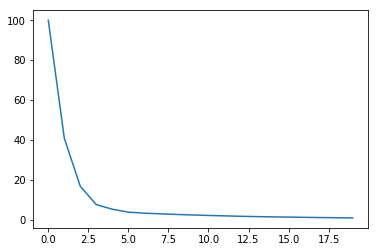

In [31]:
def fcrate(DataSet):
    #去nan
    data=replaceNan(DataSet)
    #均值归一化
    meanval=np.mean(data,axis=0)
    data=data-meanval
    #计算协方差矩阵
    covmat=np.cov(data,rowvar=0)
    #求协方差矩阵的特征向量
    #w特征值，v特征向量
    w,v=np.linalg.eig(covmat)
    #特征值从大到小排序
    sort_ix=np.argsort(-w)
    nvec=w[sort_ix]
    return nvec


x=[]
ratelist=[]
train_data=dataSet.copy()
fc=fcrate(train_data)
fc_s=np.sum(fc)
for i in range(20):
    rate=1-np.sum(fc[:i])/fc_s
    ratelist.append(rate)
    x.append(i)
print(ratelist)
ratelist=[i*100 for i in ratelist]
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x,ratelist)
plt.show()


In [ ]:
nlat_data,hlat_data,rate=pca(train_data,train_data)

In [85]:
x=[]
ratelist=[]
for i in range(1,21):
    train_data=dataSet.copy()
    nlat_data,hlat_data,rate=pca(train_data,i)
    ratelist.append(rate)
    x.append(i)


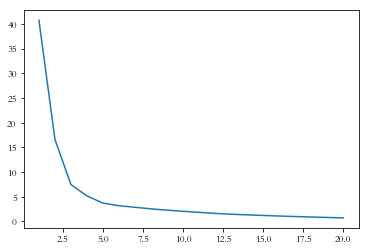

In [86]:
ratelist=[i*100 for i in ratelist]
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x,ratelist)
plt.show()

In [16]:
nan_ix=np.isnan(dataSet[:,0])

ave=np.mean(dataSet[:,0][~nan_ix])
dataSet[:,0][nan_ix]=ave


array([], dtype=float64)

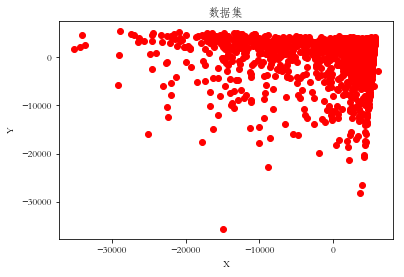

In [63]:
def Data_show(data):
    fig=plt.figure()
    plt.rcParams['font.family']=['STFangsong']#设置字体
    ax=fig.add_subplot(111)
    ax.set_title('数据集')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.scatter(data[:,0],data[:,1],c='r',marker='o')
    plt.show()
Data_show(nlat_data)

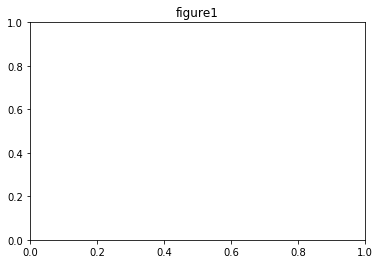

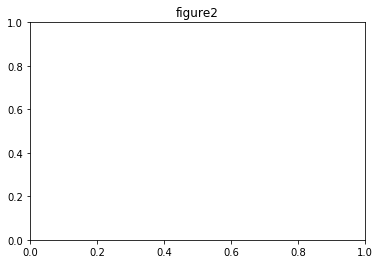

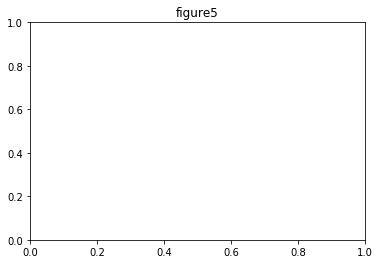

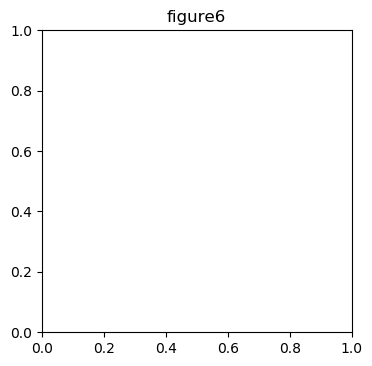

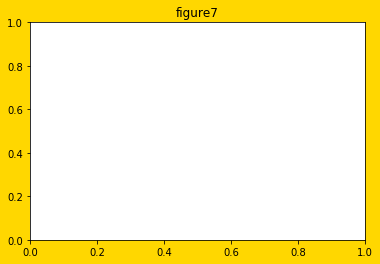

In [27]:
f1=plt.figure()
plt.title("figure1")


f2=plt.figure()
plt.title("figure2")

f3=plt.figure(5)
plt.title("figure5")

f6=plt.figure(6,(4,4),100)
plt.title("figure6")

f7=plt.figure(7,None,None,'#FFD700','#FF0000')
plt.title("figure7")
plt.show()


In [9]:
# def replaceNan(dataSet):
#     row,col=dataSet.shape
#     for i in range(col):
#         meanval=np.mean(dataSet[np.nonzero(~np.isnan(dataSet[:,i]))[0],i])
#         dataSet[np.nonzero(np.isnan(dataSet[:,i]))[0],i]=meanval
#     return dataSet

# def pca1(dataSet,n):
#     data=replaceNan(dataSet)
#     meanval=np.mean(data,axis=0)
#     meanremoved=data-meanval
#     covmat=np.cov(meanremoved,rowvar=0)
#     w,v=np.linalg.eig(covmat)
#     print(w)
# pca1(dataSet,2)

[ 5.34151979e+07  2.17466719e+07  8.24837662e+06  2.07388086e+06
  1.31540439e+06  4.67693557e+05  2.90863555e+05  2.83668601e+05
  2.37155830e+05  2.08513836e+05  1.96098849e+05  1.86856549e+05
  1.52422354e+05  1.13215032e+05  1.08493848e+05  1.02849533e+05
  1.00166164e+05  8.33473762e+04  8.15850591e+04  7.76560524e+04
  6.66060410e+04  6.52620058e+04  5.96776503e+04  5.16269933e+04
  5.03324580e+04  4.54661746e+04  4.41914029e+04  4.15532551e+04
  3.55294040e+04  3.31436743e+04  2.67385181e+04  1.47123429e+04
  1.44089194e+04  1.09321187e+04  1.04841308e+04  9.48876548e+03
  8.34665462e+03  7.22765535e+03  5.34196392e+03  4.95614671e+03
  4.23060022e+03  4.10673182e+03  3.41199406e+03  3.24193522e+03
  2.74523635e+03  2.35027999e+03  2.16835314e+03  1.86414157e+03
  1.76741826e+03  1.70492093e+03  1.66199683e+03  1.53948465e+03
  1.33096008e+03  1.25591691e+03  1.15509389e+03  1.12410108e+03
  1.03213798e+03  1.00972093e+03  9.50542179e+02  9.09791361e+02
  8.32001551e+02  8.08898